In [1]:
rm(list= ls())


In [2]:
.libPaths(c("/hsfscqjf2/ST_CQ/Reference/software/envs/ClusterGVis/lib/R/library"))


In [12]:
library(Seurat,lib.loc = "/hsfscqjf2/ST_CQ/Reference/software/envs/RTest/lib/R/library")
library(dplyr)
library(pheatmap)
library(ClusterGVis)
library(ggplot2)

In [13]:
resultdir<-"/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/6_trajectory/gene_timepoint/stage5_filrer_others"
setwd(resultdir)

In [14]:
load("cluster_timepoint.Rdata")
top_5_markers<-read.csv("top.5.marker.csv")

In [16]:
sc.data$wide.res<-sc.data$wide.res[, c("gene","Stage_1","Stage_2","Stage_3","Stage_4","Stage_5","cluster")]
sc.data$wide.res<-sc.data$wide.res[order(sc.data$wide.res$cluster),]

sc.data$long.res$cell_type<-factor(sc.data$long.res$cell_type,levels = c("Stage_1","Stage_2","Stage_3","Stage_4","Stage_5") )

In [17]:
table(sc.data$wide.res$cluster)
data<-sc.data$wide.res
data$stage<-ifelse(data$cluster=="1","Stage_5",ifelse(data$cluster=="2","Stage_4",
                                                     ifelse(data$cluster=="3","Stage_3",
                                                           ifelse(data$cluster=="4","Stage_1",
                                                                "Stage_2"))))
table(data$stage,data$cluster)
# write.csv(data,file="stage.csv")


   1    2    3    4    5 
1235  408  475  411  600 

         
             1    2    3    4    5
  Stage_1    0    0    0  411    0
  Stage_2    0    0    0    0  600
  Stage_3    0    0  475    0    0
  Stage_4    0  408    0    0    0
  Stage_5 1235    0    0    0    0

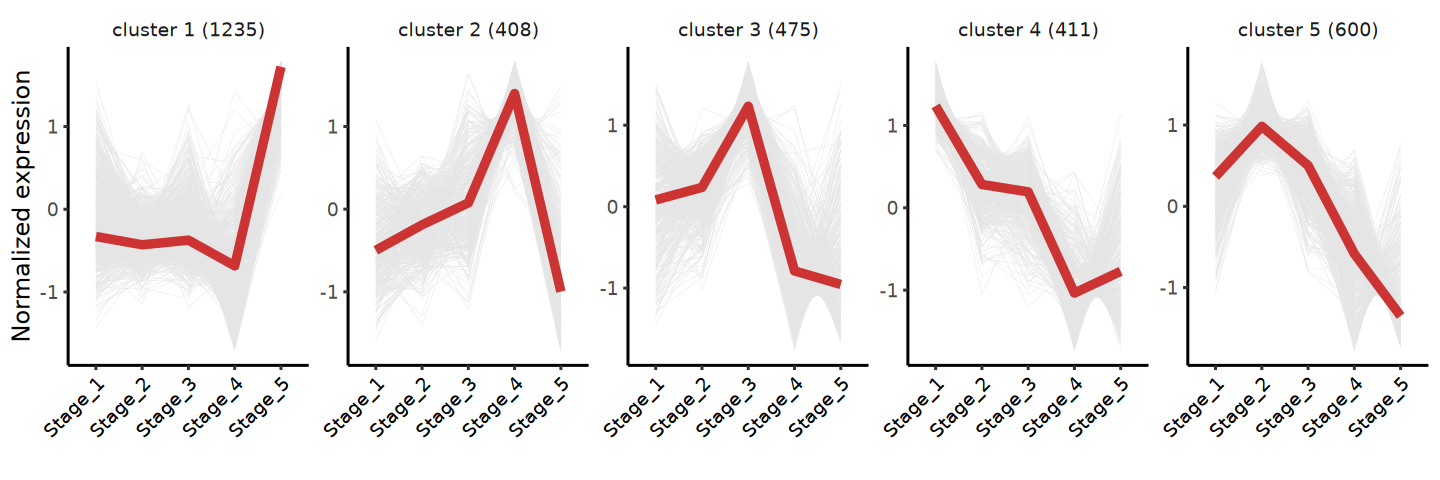

In [19]:
markGenes = top_5_markers$gene
options(repr.plot.width = 12, repr.plot.height=4)
# line plot
# pdf('sc1_line.pdf',height = 3,width = 12,onefile = F)
visCluster(object = sc.data,
           ncol=5,
           plot.type = "line",
           cluster.order = c(4,5,3,2,1),
          )
# dev.off()

This palatte have 20 colors!



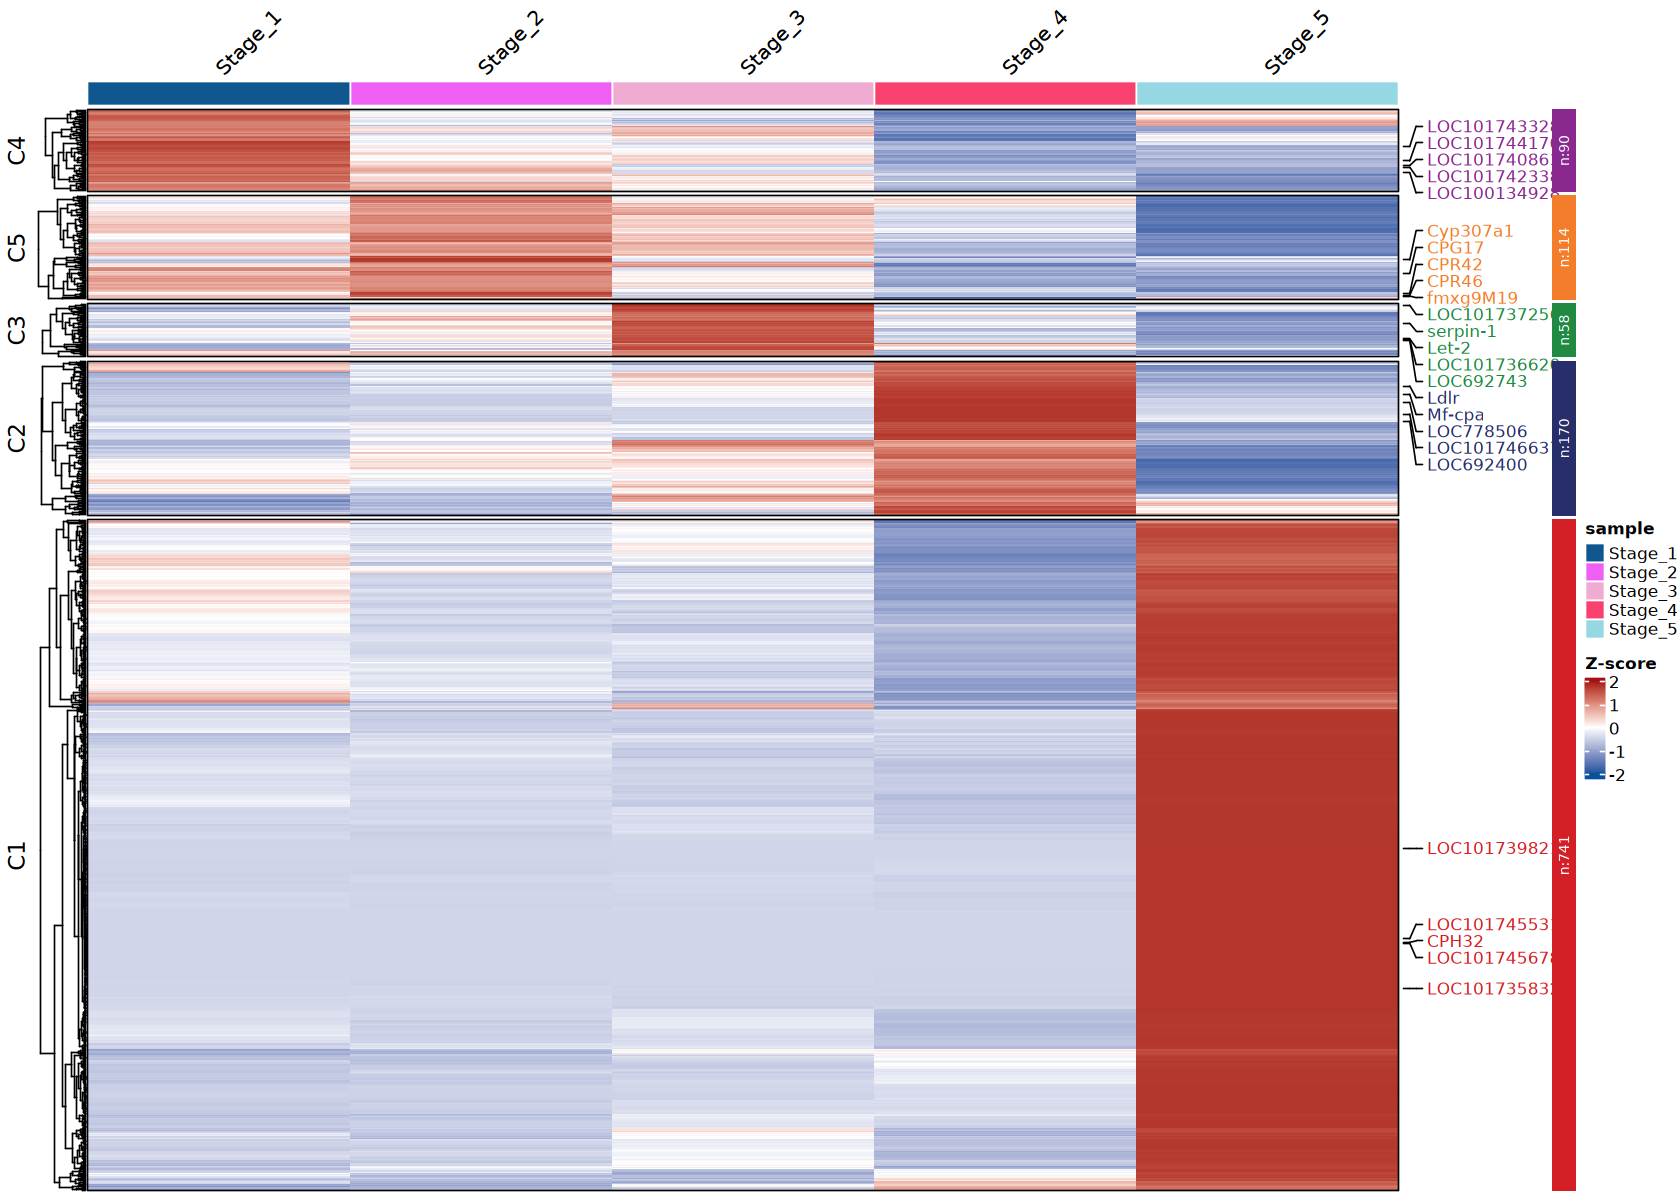

In [67]:
 
    # pdf('heatmap.pdf',height = 10,width = 6,onefile = F)

    visCluster(object = sc.data,

    plot.type = "heatmap",

    column_names_rot = 45,
   cluster.order = c(4,5,3,2,1),
    markGenes = markGenes)
    # dev.off()


In [65]:

markGenes = top_5_markers$gene
C1<-read.csv(file = "1_go_ALL.csv",header = T)
C2<-read.csv(file = "2_go_ALL.csv",header = T)
C3<-read.csv(file = "3_go_ALL.csv",header = T)
C4<-read.csv(file = "4_go_ALL.csv",header = T)
C5<-read.csv(file = "5_go_ALL.csv",header = T)



anno<-rbind(C5,rbind(C4,rbind(C3,rbind(C2,C1))))

terms<-anno[,c("cluster","Description","pvalue","GeneRatio")]
colnames(terms)<-c("id","term","pvalue","GeneRatio")

table(terms$id)
top3 <- terms %>% group_by(id) %>% top_n(-4, wt = pvalue)
    
    termanno2<-top3
pdf('heatmap_anno.pdf',height = 10,width = 12,onefile = F)
height=10
width=14
options(repr.plot.width = width, repr.plot.height=height)
visCluster(object = sc.data,
           plot.type = "both",
           column_names_rot = 45,
           show_row_dend = F,
           markGenes = markGenes,
           markGenes.side = "left",
           line.side = "left",
           annoTerm.data = termanno2,
            cluster.order = c(4,5,3,2,1),
           # go.col = rep(jjAnno::useMyCol("stallion",n = 9),each = 5),
           add.box = T)
dev.off()
# 


C1 C2 C3 C4 C5 
41 53 40  8 45 

This palatte have 20 colors!



png 
  2